# Lab 1

In [241]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt

### 1. Loading in data

In [242]:
#If you want to use the csv from this git set
url = 'https://raw.githubusercontent.com/DAVE3625/DAVE3625-24H/main/Lab1/data/stud.csv'
# You can also download the csv and set
# url="{filepath]/stud.csv"
df = pd.read_csv(url, sep=',')
df.head(3)


,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0


### 2. Cleaning the data

In [243]:
df.describe()

,StudentID,FinalGrade
count,50.000000,49.000000
mean,48969.820000,71.653061
std,26870.066326,90.455917
min,10736.000000,24.000000
25%,26666.500000,39.000000
50%,44292.000000,60.000000
75%,70400.250000,78.000000
max,99823.000000,673.000000


This is odd, Age and hrsStudy are also int/float numbers from the looks of it. We can check what pandas thinks

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


Here we can see that Age, email and hrsStudy are Dtype(O) (Object datatypes)
If we take a closer look we might find out why

In [245]:
df

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0
5,88403,29,s88403@oslomet.no,11,62.0
6,56387,32,s56387@oslomet.no,9,29.0
7,95648,23,s95648@oslomet.no,3,38.0
8,63176,20,s63176@oslomet.no,0,98.0
9,15406,31,s15406@oslomet.no,2,68.0


After close inspection, you can see row 30 and 41 have missing values, which prevents the colums from being calssified as numbers.
There are two options:
1. Delete the row (could be a good solution if the dataset is big or we need to have reliable data)
2. Fill the empty value with a dummy value. 

Age isnt too important so it could be filled in with 0, but hrsStudy is important so we should delete the whole row to not mess with the statistics.

In [246]:
df.isna().sum() #counts the empty cells in the different colums

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

This looks wrong, but thats because spaces are not counted as empty cells

In [247]:
#Lets replace all empty cells wit np.nan
df=df.replace(r'^\s*$', np.nan, regex=True)
#and check again
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

Since Age isnt that important in the dataset we can replace the missing value with 0. The other columns have important data and we will delete the rows with NaN data

In [248]:
df["Age"].replace(np.nan, 0, inplace=True) #sets NaN age to 0
df.dropna(inplace = True) #deletes NaN rows
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

An easy way to convert an object to int, is by converting it to sting first and then to ints

In [249]:
df["Age"] = df["Age"].astype(str).astype(int)
df["hrsStudy"] = df["hrsStudy"].astype(str).astype(int)

In [250]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int32  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int32  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 1.9+ KB


,StudentID,Age,hrsStudy,FinalGrade
count,48.000000,48.000000,48.000000,48.000000
mean,50338.166667,35.666667,6.395833,72.083333
std,26526.981827,52.388619,3.648022,91.362461
min,11758.000000,0.000000,0.000000,24.000000
25%,28399.750000,22.000000,3.000000,38.750000
50%,45986.500000,25.000000,7.000000,61.000000
75%,71524.000000,31.000000,10.000000,78.500000
max,99823.000000,333.000000,11.000000,673.000000


### 3. Identify outliers

Now that we have cleaned the dataset, we have to check if the values are correct. From reading the df.describe() table above we can see that max age is 333 and max final grade is 673. Something is clearly wrong

<Axes: >

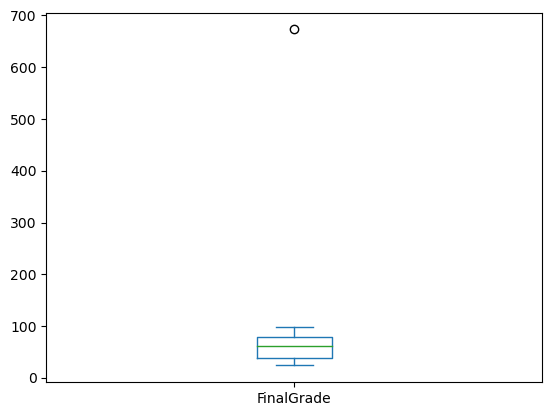

In [251]:
df["FinalGrade"].plot.box()

In [252]:
#calculate z-score of FinalGrade column in df
z_scores = stats.zscore(df["FinalGrade"])
#makes absolute values of the z-scores
abs_z_scores = np.abs(z_scores)
#drop all rows in the third quantile
df.drop(df[abs_z_scores > 3].index, inplace=True)

<Axes: >

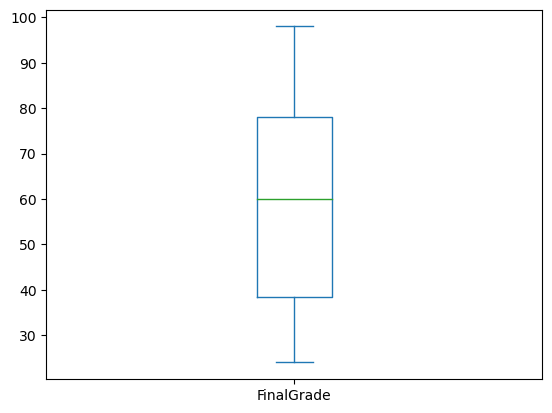

In [253]:
df["FinalGrade"].plot.box()

In [254]:
# the index counts to 49, but we have dropped several values.. to reset the index you can use
df = df.reset_index(drop=True)
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
42,62039,23,s62039@oslomet.no,4,46.0
43,42989,27,s42989@oslomet.no,0,80.0
44,85370,29,s85370@oslomet.no,2,77.0
45,63135,26,s63135@oslomet.no,9,39.0
46,28895,19,s28895@oslomet.no,10,68.0


### 4. Adding Grade column and transforming grafe from float to char

91 - 100 = A

81 - 90  = B

71 - 80  = C

61 – 70  = D

51 – 60  = E

num  > 50  = F

These are the values we will use

In [255]:
# create a list of our conditions
conditions = [
    (df['FinalGrade'] <= 50.0),
    (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
    (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
    (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
    (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
    (df['FinalGrade'] > 90.0)
    ]

# create a list of the values we want to assign for each condition
values = ['F', 'E', 'D', 'C', 'B', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Grade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


### 5. Produce plot

<Axes: xlabel='Grade'>

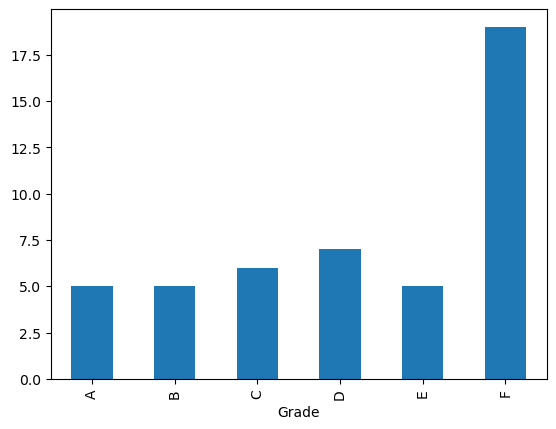

In [256]:
df_gradeCount = df.groupby('Grade').count() #Group the different grades and count
df_gradeCount["FinalGrade"].plot.bar()